# Day 09. Exercise 02
# Metrics

## 0. Imports

In [549]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from pprint import pprint

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [550]:
df_x = pd.read_csv('../data/day-of-week-not-scaled.csv')
df_y = pd.read_csv('../data/dayofweek.csv')

In [551]:
y = df_y['dayofweek']
X = df_x


In [552]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=21)


## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [553]:
svc = SVC(class_weight=None,gamma='auto',C=10,kernel='rbf',probability=True,random_state=21)
svc.fit(X_train,y_train)

SVC(C=10, gamma='auto', probability=True, random_state=21)

### Confusion matrix

TP: is True and classified as True <br>
TN: is False and classified as False<br>
FP: is False but classified as True<br>
FN: is True but classified as False<br>

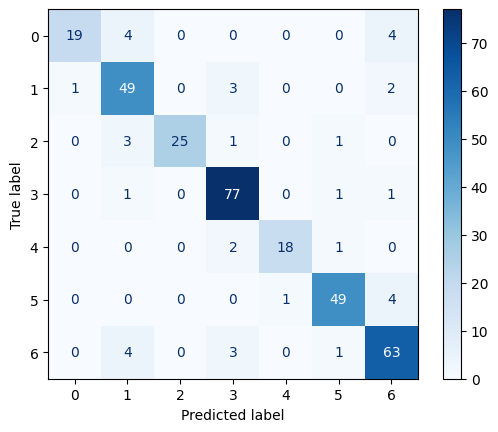

In [555]:
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap='Blues')

### Accuracy

**Accuracy** is defined as:

**Accuracy** = (Number of correctly classified instances) / (Total number of instances)

In [556]:

accuracy = accuracy_score(y_pred,y_test)
accuracy


0.8875739644970414

### Precision

Number of correctly labelled positive instances out of all positive labelled instances

**Precision** is defined as:

**Precision** = (TP) / (TP+FP)

average='micro' when you want to assess the overall performance of the model across all classes, treating each instance equally. This method is suitable when the class distribution is balanced. 

average='weighted' when you want to account for class imbalance by giving more importance to classes with more instances. This method is useful when the class distribution is imbalanced, and you want to ensure that the model performs well on the majority classes without neglecting the minority classes.

In [557]:
# average='micro' when you want to assess the overall performance of the model across all classes, treating each instance equally. This method is suitable when the class distribution is balanced. 
precision = precision_score(y_pred,y_test,average='weighted')
precision 

0.8936927238525288

### Recall

Number of correctly labelled positive instances out of all positive instances

**Recall** is defined as:

**Recall** = (TP) / (TP+FN)

In [558]:
recall = recall_score(y_pred,y_test,average='weighted')
recall



0.8875739644970414

In [559]:
y_proba = svc.predict_proba(X_test)  

y_test_bin = label_binarize(y_test, classes=svc.classes_) 

roc_auc = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovo')
# print(f"Weighted Average ROC AUC : {roc_auc:.5f}")
print(f'roc auc is {roc_auc:.5f}')


roc auc is 0.98168


In [560]:
print(f'accuracy is {accuracy:.5f}')
print(f'precision is {precision:.5f}')
print(f'recall is {recall:.5f}')
print(f'roc auc is {roc_auc:.5f}')


accuracy is 0.88757
precision is 0.89369
recall is 0.88757
roc auc is 0.98168


## 3. Decision tree

1. The same task for decision tree

In [561]:
# 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 22, 'random_state': 21}
dt = DecisionTreeClassifier(class_weight='balanced',criterion='gini',random_state=21,max_depth=22)

In [562]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=22, random_state=21)

In [563]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test,average='weighted')
recall = recall_score(y_pred,y_test,average='weighted')

y_proba = dt.predict_proba(X_test)
y_test_bin = label_binarize(y_test,classes=dt.classes_)
roc_auc = roc_auc_score(y_test_bin,y_proba,average='weighted',multi_class='ovo')

In [564]:
print(f'accuracy is {accuracy:.5f}')
print(f'precision is {precision:.5f}')
print(f'recall is {recall:.5f}')
print(f'roc auc is {roc_auc:.5f}')


accuracy is 0.89053
precision is 0.89167
recall is 0.89053
roc auc is 0.93806


## 4. Random forest

1. The same task for random forest.

In [565]:
rf = RandomForestClassifier(class_weight='balanced',criterion='entropy',max_depth=24,n_estimators=100,random_state=21)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=24, random_state=21)

In [566]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test,average='weighted')
recall = recall_score(y_pred,y_test,average='weighted')

y_proba = rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test,classes=rf.classes_)
roc_auc = roc_auc_score(y_test_bin,y_proba,average='weighted',multi_class='ovo')

In [567]:
print(f'accuracy is {accuracy:.5f}')
print(f'precision is {precision:.5f}')
print(f'recall is {recall:.5f}')
print(f'roc auc is {roc_auc:.5f}')


accuracy is 0.93195
precision is 0.93478
recall is 0.93195
roc auc is 0.99023


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

In [568]:
rf = RandomForestClassifier(class_weight='balanced',criterion='entropy',max_depth=24,n_estimators=100,random_state=21)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=24, random_state=21)

In [569]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test,average='weighted')
recall = recall_score(y_pred,y_test,average='weighted')

y_proba = rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test,classes=rf.classes_)
roc_auc = roc_auc_score(y_test_bin,y_proba,average='weighted',multi_class='ovo')

In [570]:
print(f'accuracy is {accuracy:.5f}')
print(f'precision is {precision:.5f}')
print(f'recall is {recall:.5f}')
print(f'roc auc is {roc_auc:.5f}')


accuracy is 0.93195
precision is 0.93478
recall is 0.93195
roc auc is 0.99023


In [571]:
results = pd.DataFrame({'true': y_test, 'pred': y_pred})
results

,true,pred
1087,1,1
16,5,5
563,6,6
1381,3,3
1199,2,2
...,...,...
1411,3,3
1079,1,1
1222,2,2
1064,1,1


In [572]:

weekday = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
           4: "Friday", 5: "Saturday", 6: "Sunday"}


errors = results[results['true'] != results['pred']]['true'].value_counts()
totals = results['true'].value_counts()

errors


true
0    6
5    5
1    3
4    3
3    2
6    2
2    2
Name: count, dtype: int64

In [573]:
error_percent = (errors / totals * 100).round(2).fillna(0)

print("Misclassification percentages per weekday:")
for day_num in error_percent.sort_values(ascending=False).index:
    print(f"{weekday[day_num]}: {error_percent[day_num]}%")

worst_day = error_percent.idxmax()
print(f"\nWeekday with most errors: {weekday[worst_day]} ({error_percent[worst_day]}%)")

Misclassification percentages per weekday:
Monday: 22.22%
Friday: 14.29%
Saturday: 9.26%
Wednesday: 6.67%
Tuesday: 5.45%
Sunday: 2.82%
Thursday: 2.5%

Weekday with most errors: Monday (22.22%)


In [574]:
lab_cols = [col for col in X_test.columns if col.startswith('labname_')]
results['labname'] = X_test[lab_cols].idxmax(axis=1).str.replace('labname_', '')

In [575]:
lab_errors = results[results['true'] != results['pred']]['labname'].value_counts()
lab_totals = results['labname'].value_counts()
lab_error_percent = (lab_errors / lab_totals * 100).round(2).fillna(0)
worst_lab = lab_error_percent.idxmax()
print(f"Lab with most errors: {worst_lab} ({lab_error_percent[worst_lab]}%)")

Lab with most errors: lab03 (100.0%)


In [576]:
user_cols = [col for col in X_test.columns if col.startswith('uid_user_')]
results['user'] = X_test[user_cols].idxmax(axis=1)

In [577]:
user_errors = results[results['true'] != results['pred']]['user'].value_counts()
user_totals = results['user'].value_counts()
user_error_percent = (user_errors / user_totals * 100).round(2).fillna(0)
worst_user = user_error_percent.idxmax()
print(f"User with most errors: {worst_user} ({user_error_percent[worst_user]}%)")


User with most errors: uid_user_6 (50.0%)


## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [578]:
def metrics(models,params_list):
    res = {}
    model_metrics =[]
    for i,model_class in enumerate(models):
        model_metrics =[]
        model = model_class(**params_list[i])
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred,average='weighted')
        recall = recall_score(y_test,y_pred,average='weighted')

        y_proba = model.predict_proba(X_test)
        y_test_bin = label_binarize(y_test,classes=model.classes_)
        roc_auc = roc_auc_score(y_test_bin,y_proba,average='weighted')
        model_metrics.append(f'accuracy :{accuracy:.5f}')
        model_metrics.append(f'precision :{precision:.5f}')
        model_metrics.append(f'recall :{recall:.5f}')
        model_metrics.append(f'roc_auc :{roc_auc:.5f}')

        res[model_class.__name__] = model_metrics

    return res


In [579]:
models_list = [SVC,DecisionTreeClassifier,RandomForestClassifier]
params_list = [{
    'C':10,
    'class_weight': None,
    'gamma': 'auto',
    'probability': True,
    'random_state': 21
},{
    'class_weight': 'balanced', 
    'criterion': 'gini', 
    'max_depth': 22, 
    'random_state': 21
},
{
    'n_estimators': 100,
    'max_depth': 24,
    'class_weight': 'balanced',
    'criterion': 'entropy',
    'random_state': 21
}]
result = metrics(models_list,params_list)
pprint(result)

{'DecisionTreeClassifier': ['accuracy :0.89053',
                            'precision :0.89262',
                            'recall :0.89053',
                            'roc_auc :0.93806'],
 'RandomForestClassifier': ['accuracy :0.93195',
                            'precision :0.93402',
                            'recall :0.93195',
                            'roc_auc :0.99023'],
 'SVC': ['accuracy :0.88757',
         'precision :0.89267',
         'recall :0.88757',
         'roc_auc :0.98168']}
